In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/kirenz/classification/main/_static/data/Default.csv')

# Note: factorize() returns two objects: a label array and an array with the unique values.
# We are only interested in the first object. 
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0


In [2]:
X = df[['balance', 'income', 'student2']]
y = df.default2

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [3]:
from sklearn.linear_model import SGDClassifier

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200, fit_intercept=True)
clf.fit(X_train, y_train)

y_pred = clf.fit(X_train, y_train).predict(X_test)

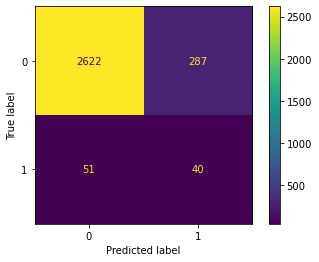

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.98      0.90      0.94      2909
         Yes       0.12      0.44      0.19        91

    accuracy                           0.89      3000
   macro avg       0.55      0.67      0.57      3000
weighted avg       0.95      0.89      0.92      3000

